# **<span style="font-family: 'Palatino Linotype', serif;">📉🤯📚 A curva de aprendiado</span>**
----
*<span style="font-family: 'Angilla Tattoo'"> “Nem toda magia é feita de feitiços — algumas são compiladas linha por linha, na curva de aprendizado entre penas e códigos.” 🦆✨📈</span>*

<div align="center">
    <img src = "Maga curva.png" alt = "Maga curva aprendizado" width = 250>
</div>

----
 **Objetivo:** Nesse notebook, irei implementar o registro da curva de aprendizado dos dados de treino e de validação do código nas redes neurais feita em python puro em sala de aula. Para isso, utilizaremos o dataset de flores Iris disponível no seaborn.
 
---

In [89]:
# importando funções para MLP
from rede_neural import Valor, Neuronio, Camada, MLP
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import torch.nn as nn

In [90]:
# Definindo parêmetros que serão utilizados na rede neural MLP
TAMANHO_TESTE = 0.1
TAMANHO_VALIDACAO = 0.2
SEMENTE_ALEATORIA = 12345
NUM_EPOCAS = 30

In [91]:
# baixando dataset
df = sns.load_dataset("penguins") 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [92]:
# definindo atributos e targets
ATRIBUTOS = ["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm"]
TARGET = ["body_mass_g"]
df = sns.load_dataset("penguins")
df = df.reindex(ATRIBUTOS + TARGET, axis=1)
df = df.dropna()
print(df)


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[342 rows x 4 columns]


In [93]:
# dividindo os dados en validação e teste
indices = df.index 
indices_treino_val, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Dados de treino e validação
df_treino_val = df.loc[indices_treino_val]
df_teste = df.loc[indices_teste]
print(f"Dados de X treino e validação: {df_treino_val}, comprimento de {len(df_treino_val)}")

#definir x, y teste
X_teste = df_teste.reindex(ATRIBUTOS, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values
print(f"Dados de X teste: {X_teste}, comprimento de {len(X_teste)}")
print(f"Dados de y teste: {y_teste}, comprimento de {len(y_teste)}")

Dados de X treino e validação:      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
196            50.9           17.9              196.0       3675.0
162            46.6           17.8              193.0       3800.0
42             36.0           18.5              186.0       3100.0
53             42.0           19.5              200.0       4050.0
178            50.5           18.4              200.0       3400.0
..              ...            ...                ...          ...
258            44.0           13.6              208.0       4350.0
30             39.5           16.7              178.0       3250.0
35             39.2           21.1              196.0       4150.0
130            38.5           17.9              190.0       3325.0
286            46.2           14.4              214.0       4650.0

[307 rows x 4 columns], comprimento de 307
Dados de X teste: [[ 45.8  14.2 219. ]
 [ 52.   18.1 201. ]
 [ 46.1  15.1 215. ]
 [ 46.4  17.8 191. ]
 [ 41.1  17.6 182. 

In [94]:
# divido os dados em X e Y para teste e validação
indices = df_treino_val.index
indices_treino, indices_val = train_test_split(
    indices, test_size=TAMANHO_VALIDACAO, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_val = df.loc[indices_val]
print(f"Dataset do treino {df_treino}, com comprimento de {len(df_treino)}")
print(f"Dataset da validação{df_val}, com comprimento de {len(df_val)}")

X_treino = df_treino.reindex(ATRIBUTOS, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values

X_val = df_val.reindex(ATRIBUTOS, axis=1).values
y_val = df_val.reindex(TARGET, axis=1).values

Dataset do treino      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
89             38.9           18.8              190.0       3600.0
2              40.3           18.0              195.0       3250.0
148            36.0           17.8              195.0       3450.0
5              39.3           20.6              190.0       3650.0
203            51.4           19.0              201.0       3950.0
..              ...            ...                ...          ...
75             42.8           18.5              195.0       4250.0
334            46.2           14.1              217.0       4375.0
135            41.1           17.5              190.0       3900.0
188            47.6           18.3              195.0       3850.0
232            45.5           13.7              214.0       4650.0

[245 rows x 4 columns], com comprimento de 245
Dataset da validação     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
49             42.3           21.2         

In [95]:
#Normalização dos dados
x_scaler = MaxAbsScaler()
x_scaler.fit(X_treino)

y_scaler = MaxAbsScaler()
y_scaler.fit(y_treino)

X_treino = x_scaler.transform(X_treino)
y_treino = y_scaler.transform(y_treino)

X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

X_teste = x_scaler.transform(X_teste)
y_teste = y_scaler.transform(y_teste)

In [96]:
# Construindo a rede neural MLP
NUM_DADOS_DE_ENTRADA = len(ATRIBUTOS)
NUM_DADOS_DE_SAIDA = 1 
CAMADAS_OCULTAS = [3, 4, 3] 

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [97]:
# Rodando a rede neural
NUM_EPOCAS = 100
TAXA_DE_APRENDIZADO = 10e-4 #0.0001

historico_loss_treino = []
historico_loss_val = []

for epoca in range(NUM_EPOCAS):
    # treinando
    y_pred = []
    y_val = []
    for exemplo in X_treino:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    for exemplo_val in X_val:
        previsao_val = minha_mlp(exemplo_val)
        y_val.append(previsao_val)

    # loss do treino
    erros_treino = []
    erros_val = []

    for yt, yp in zip(y_treino, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros_treino.append(erro_quadratico)    
    loss_treino = sum(erros_treino)
    historico_loss_treino.append(loss_treino.data)

    for yt_val, yp_val in zip(y_treino, y_val):
        residuo_val = yp_val - yt_val
        erro_quadratico_val = residuo_val ** 2
        erros_val.append(erro_quadratico_val)
    loss_val = sum(erros_val)
    historico_loss_val.append(loss_val.data)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss_treino.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO
    
    y_pred_val = []

    # mostra resultado (opcional)
    print("A perda do treino é", loss_treino.data, "A perda da validação é", loss_val.data)

A perda do treino é [20.08967823] A perda da validação é [4.90660554]
A perda do treino é [17.97822117] A perda da validação é [4.39612242]
A perda do treino é [16.10960259] A perda da validação é [3.94592177]
A perda do treino é [14.46946149] A perda da validação é [3.55227599]
A perda do treino é [13.03946476] A perda da validação é [3.21049825]
A perda do treino é [11.7992349] A perda da validação é [2.91542273]
A perda do treino é [10.72787278] A perda da validação é [2.66178172]
A perda do treino é [9.80505101] A perda da validação é [2.44447437]
A perda do treino é [9.0117212] A perda da validação é [2.25873866]
A perda do treino é [8.33051044] A perda da validação é [2.10024592]
A perda do treino é [7.74588815] A perda da validação é [1.96513859]
A perda do treino é [7.24417617] A perda da validação é [1.85002935]
A perda do treino é [6.81346059] A perda da validação é [1.75197641]
A perda do treino é [6.4434487] A perda da validação é [1.66844568]
A perda do treino é [6.1253008

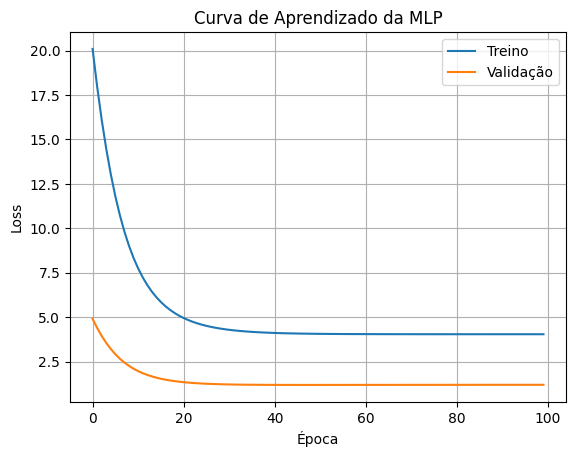

In [99]:
plt.plot(historico_loss_treino, label = "Treino")
plt.plot(historico_loss_val, label = "Validação")
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Aprendizado da MLP')
plt.legend()
plt.grid(True)
plt.show()

-----

### 📊 Conclusão:

Nesse notebook, exploramos o funcionamento da taxa de aprendizado para diferentes conjuntos de dado. Nesse caso, utilizamos 10% dos dados para realizar teste e 20% dos dados para as validações. Foi possível observar que os dados de validação iniciam com uma loss maior e tem uma queda significativa ao longo do treino, enquanto os dados de teste começãm com uma loss baixa e caem em taxas menores ao longo do treinamento. Podemos observar que não houve overfitting, o que indica que nossa rede foi eficiente em tratar os dados observados.

A função da curva de aprendizado permite compreender se o treino da nossa rede neural realmente está funcionando de forma eficiente, de forma a diminuir a perda conforme as gerações passam. Para isso, realizamos o plot da curva dos dados de validação. Como estes dados não foram expostos a nossa rede neural, o resultado da sua perda reflete de maneira mais precisa o desempenho da rede neural.

Agradecimentos ao aluno Emanuel Piveta Pozzobon que auxílio na construção desse código.

----
### 📚 Referências:
DEEP LEARNING BOOK. O efeito da taxa de aprendizagem no treinamento de redes neurais artificiais. Disponível em: <https://www.deeplearningbook.com.br/o-efeito-da-taxa-de-aprendizagem-no-treinamento-de-redes-neurais-artificiais/>. Acesso em: 18 abr. 2025.

OPENAI. ChatGPT (versão GPT-4) [programa de computador]. Disponível em: <https://chat.openai.com/>. Acesso em: 18 abr. 2025.